In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,matthews_corrcoef,roc_auc_score,roc_curve

from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

In [ ]:
df = pd.read_csv('/content/drive/My Drive/TMU MSC/MRP/final.csv') # READING THE FINAL DATASET WITH EXTRACTED FEATURES FOR BOTH CLASSES

In [ ]:
df.head()

,chroma_stft,rms,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,spectral_contrast,label
0,0.499429,0.045906,1477.871452,1650.648672,2756.250000,0.060203,-347.903839,129.911545,-12.688540,35.006527,...,4.356218,8.751603,4.949977,0.441512,1.470134,3.997265,-0.351662,3.268352,21.671775,0
1,0.486760,0.053563,1589.997260,1340.286377,2237.250866,0.102151,-205.790100,129.722672,-100.581757,-53.443851,...,-8.526023,-2.834571,-16.885719,1.259422,-3.710742,-3.283498,1.299076,3.501615,20.861829,1
2,0.283023,0.019542,1245.617540,1607.189807,2153.565008,0.039284,-372.478149,145.942841,-22.395941,6.288597,...,-9.829761,-7.139560,-7.890902,1.485827,-11.636086,-7.770608,-6.128963,-5.891862,24.880914,1
3,0.704936,0.012575,3658.994010,2561.641643,6670.466561,0.261214,-237.726913,18.325443,-59.224773,-15.345366,...,-13.352977,-8.223192,-9.669504,-2.235290,-8.099798,-1.844251,-6.385151,-3.172643,18.112736,0
4,0.388010,0.015539,3194.280182,2405.771778,5576.365523,0.180220,-331.307159,55.652039,8.687071,1.657524,...,-9.651941,-7.914859,-13.250055,-8.507153,-13.488628,-5.689762,-8.554969,-10.048347,21.739148,0


In [ ]:
#splitting 80% data for training and rest 20 % for validation and testing
train_df, temp_df = train_test_split(df, test_size=0.20, random_state=42)


In [ ]:
#splitting the rest 20% into test and validation.
#total train 80%, test 10%, validation 10%
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

In [ ]:
len (train_df) , len(val_df), len(test_df)

(27485, 3436, 3436)

<Axes: >

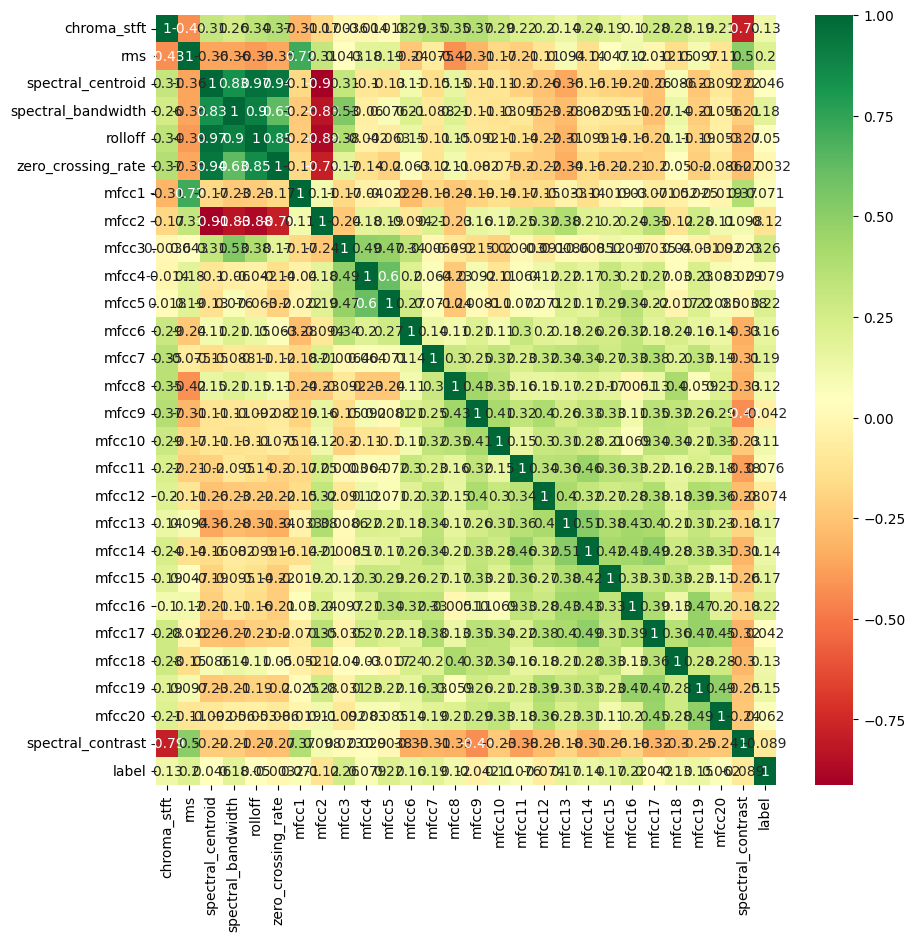

In [ ]:
#correlationamong variables
corr_mat=train_df.corr()
plt.figure(figsize=(10,10))
#plot heat map
sns.heatmap(corr_mat,annot=True,cmap="RdYlGn")

In [ ]:
#splitting in to independent and dependent variables
X = train_df.drop('label', axis=1)
y = train_df['label']
print(X.head())
print(y.head())

       chroma_stft       rms  spectral_centroid  spectral_bandwidth  \
33405     0.331439  0.065702         885.744405          971.181458   
34278     0.300582  0.027193        1613.883396         2406.703422   
32724     0.334989  0.004942        1889.414145         2127.016814   
4070      0.394125  0.022782        2911.867631         2435.907351   
4149      0.435705  0.051785        2316.728447         2082.170247   

           rolloff  zero_crossing_rate       mfcc1       mfcc2      mfcc3  \
33405  1724.883823            0.045023 -285.342957  199.068573 -36.756741   
34278  3317.336759            0.054732 -338.788940  120.434784  33.365105   
32724  3298.739901            0.093972 -495.765991  120.130707  20.640245   
4070   5539.416504            0.188255 -307.446503   70.325493   1.635302   
4149   3912.191495            0.124767 -176.293884   84.170784 -62.681076   

           mfcc4  ...     mfcc12     mfcc13    mfcc14     mfcc15     mfcc16  \
33405  36.658417  ...   6.43676

In [ ]:
train_df = df.drop('label', axis=1) # see the variance in the data
feat_var = train_df.var()
feat_var

chroma_stft           7.956248e-03
rms                   1.018911e-03
spectral_centroid     5.379487e+05
spectral_bandwidth    2.003462e+05
rolloff               1.880698e+06
zero_crossing_rate    3.425986e-03
mfcc1                 7.788917e+03
mfcc2                 1.479563e+03
mfcc3                 8.240869e+02
mfcc4                 3.525188e+02
mfcc5                 3.312066e+02
mfcc6                 1.167880e+02
mfcc7                 9.677711e+01
mfcc8                 9.448114e+01
mfcc9                 6.362627e+01
mfcc10                6.624141e+01
mfcc11                5.303790e+01
mfcc12                3.865377e+01
mfcc13                3.148704e+01
mfcc14                3.196764e+01
mfcc15                3.071098e+01
mfcc16                3.103827e+01
mfcc17                2.798047e+01
mfcc18                1.958242e+01
mfcc19                2.518436e+01
mfcc20                2.434068e+01
spectral_contrast     2.567395e+00
dtype: float64

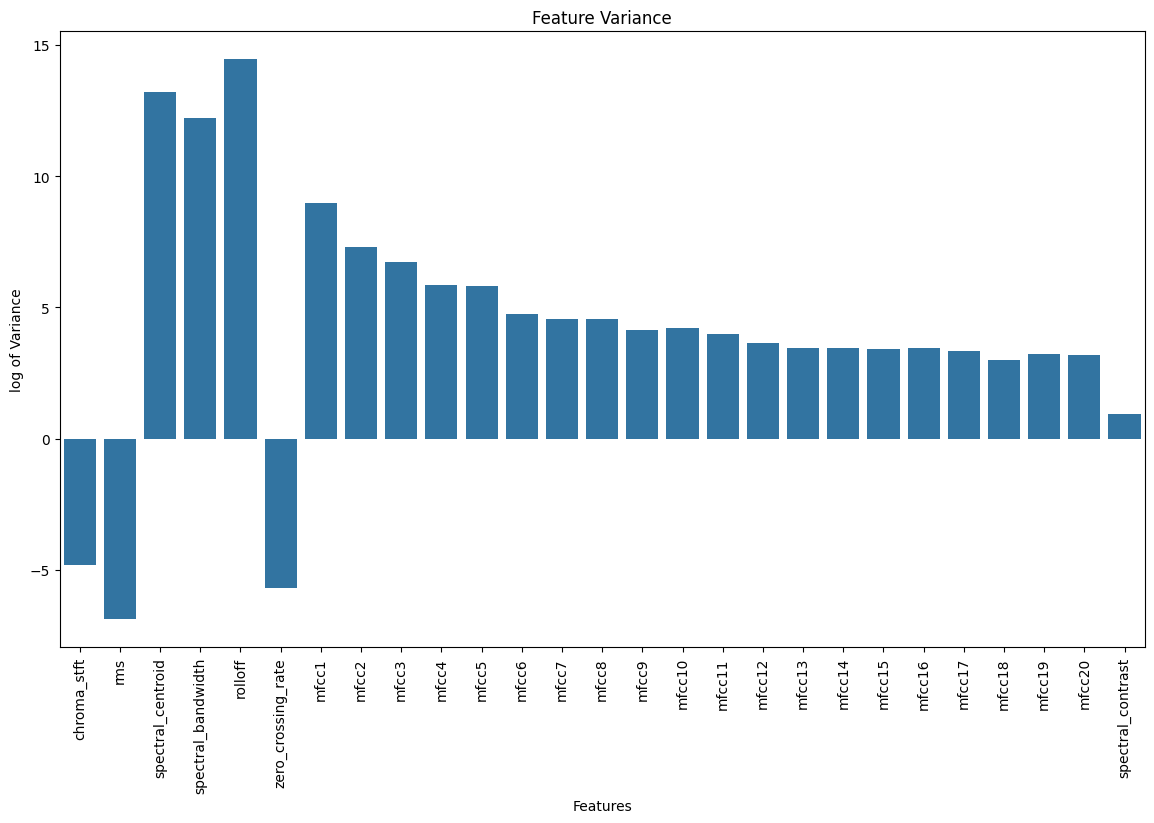

In [ ]:
plt.figure(figsize=(14, 8))
sns.barplot(x=feat_var.index, y=np.log(feat_var.values))
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('log of Variance')
plt.title('Feature Variance')
plt.show()


In [ ]:
#standerdizing the train data to get the best features as chi squre doenst not work with negetive data
sc = MinMaxScaler()
X_sc = sc.fit_transform(X)
bestfeatures = SelectKBest(score_func=chi2)
fit = bestfeatures.fit(X_sc,y)


In [ ]:
#creating a df to see the scores
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
featureScores.sort_values(by='Score',ascending=False)

,Specs,Score
1,rms,131.576777
8,mfcc3,68.090532
3,spectral_bandwidth,48.928897
21,mfcc16,28.065830
0,chroma_stft,25.351489
12,mfcc7,24.475984
18,mfcc13,21.922015
10,mfcc5,18.750683
20,mfcc15,17.429987
11,mfcc6,17.185576


**Feature Importance**

[0.0240681  0.0914042  0.02895457 0.06195194 0.03176423 0.02070051
 0.04187495 0.04072897 0.05862246 0.02782109 0.04888175 0.02341144
 0.04618899 0.03642311 0.02577181 0.04117041 0.02662516 0.02446188
 0.03774247 0.0307108  0.03476482 0.03714998 0.03508218 0.03035762
 0.03837265 0.02344859 0.0315453 ]


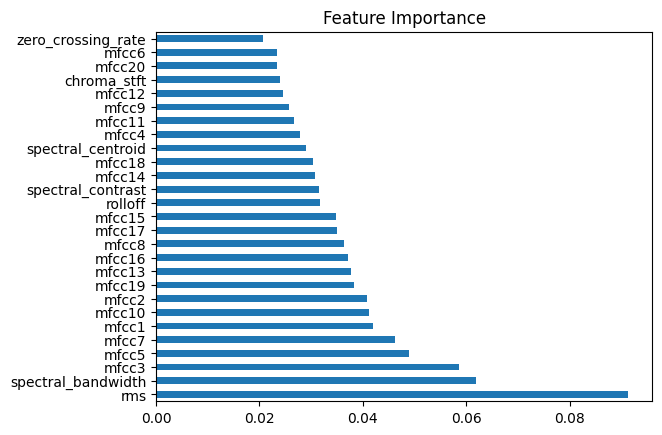

In [ ]:

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(27).plot(kind='barh')
plt.title('Feature Importance')
plt.show()

**PCA**

In [ ]:
#PCA
pca=PCA()
X_sc_pca = pca.fit_transform(X_sc)
X_sc_pca.shape

(27485, 27)

Text(0, 0.5, 'Variance (%)')

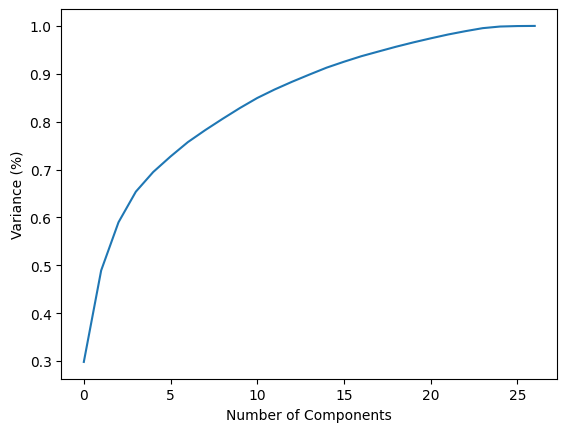

In [ ]:

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')

In [ ]:
pca.explained_variance_ratio_

array([2.98064363e-01, 1.91106361e-01, 1.00626278e-01, 6.39371236e-02,
       4.10379889e-02, 3.24460456e-02, 3.00541756e-02, 2.50609490e-02,
       2.35276222e-02, 2.26316157e-02, 2.09477353e-02, 1.77402234e-02,
       1.60632813e-02, 1.50255609e-02, 1.45666791e-02, 1.23379643e-02,
       1.15272540e-02, 9.95882093e-03, 9.85686200e-03, 9.07048077e-03,
       8.44810711e-03, 8.02238475e-03, 6.97586555e-03, 6.30141728e-03,
       3.39402226e-03, 9.92939155e-04, 2.77879412e-04])

In [ ]:
pca.n_components_

27

**Using first 20 PCA components to train**

In [ ]:
pca = PCA(n_components=20)
X_train_pca = pca.fit_transform(X_sc)

Usining the fisrt 20 principal components for Random Forest

In [ ]:
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'LDA': LinearDiscriminantAnalysis(),
    'QDA': QuadraticDiscriminantAnalysis()
}

param_grids = {
    'RandomForest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30]
    },
    'XGBoost': {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 6, 10],
        'learning_rate': [0.01, 0.1, 0.2]
    },
    'LDA': {
        'solver': ['svd', 'lsqr', 'eigen']
    },
    'QDA': {
        'reg_param': [0.0, 0.1, 0.5, 1.0]
    }
}

In [ ]:
best_models = {} #  for PCA
for model_name in models.keys():
    grid_search = GridSearchCV(models[model_name], param_grids[model_name], cv=10, scoring='accuracy')
    grid_search.fit(X_train_pca,y )
    best_models[model_name] = grid_search.best_estimator_
    print(f'Best parameters for {model_name}: {grid_search.best_params_}')

Best parameters for RandomForest: {'max_depth': None, 'n_estimators': 200}


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:43:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:43:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:43:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:43:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:43:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Best parameters for XGBoost: {'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 200}
Best parameters for LDA: {'solver': 'svd'}
Best parameters for QDA: {'reg_param': 0.0}


In [ ]:
val_df_X = val_df.drop('label', axis=1)
val_df_y = val_df['label']
val_df_X.head()

#STANDERDIZED VALIDATION DF
val_df_X_sc = sc.transform(val_df_X)



In [ ]:
val_df_pca = pca.fit_transform(val_df_X_sc)

In [ ]:
results = [] # PREDICTION FOR USING PCA
for model_name, model in best_models.items():
    y_pred = model.predict(val_df_pca)
    y_proba = model.predict_proba(val_df_pca)[:, 1] if hasattr(model, 'predict_proba') else y_pred

    accuracy = accuracy_score(val_df_y, y_pred)
    precision = precision_score(val_df_y, y_pred, average='macro')
    recall = recall_score(val_df_y, y_pred, average='macro')
    roc_auc = roc_auc_score(val_df_y, y_proba, multi_class='ovr') if model_name in ['RandomForest', 'XGBoost'] else roc_auc_score(val_df_y, y_pred, multi_class='ovr')
    mcc = matthews_corrcoef(val_df_y, y_pred)

    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'ROC-AUC': roc_auc,
        'MCC': mcc
    })

    print(f'{model_name} Results:')
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'ROC-AUC: {roc_auc}')
    print(f'MCC: {mcc}')

RandomForest Results:
Accuracy: 0.779976717112922
Precision: 0.7950943317779882
Recall: 0.7669821040871676
ROC-AUC: 0.8688695991757341
MCC: 0.561372979764021
XGBoost Results:
Accuracy: 0.7860884749708964
Precision: 0.7989406681675297
Recall: 0.7740817542939351
ROC-AUC: 0.8665584469987508
MCC: 0.5724829526235962
LDA Results:
Accuracy: 0.660069848661234
Precision: 0.6573466847958093
Recall: 0.6504163903896284
ROC-AUC: 0.6504163903896284
MCC: 0.307685036144173
QDA Results:
Accuracy: 0.719441210710128
Precision: 0.7180492279115331
Recall: 0.7198196901206066
ROC-AUC: 0.7198196901206066
MCC: 0.4378653387083785


In [ ]:
results_df = pd.DataFrame(results)
results_df.head()

,Model,Accuracy,Precision,Recall,ROC-AUC,MCC
0,RandomForest,0.779977,0.795094,0.766982,0.868870,0.561373
1,XGBoost,0.786088,0.798941,0.774082,0.866558,0.572483
2,LDA,0.660070,0.657347,0.650416,0.650416,0.307685
3,QDA,0.719441,0.718049,0.719820,0.719820,0.437865


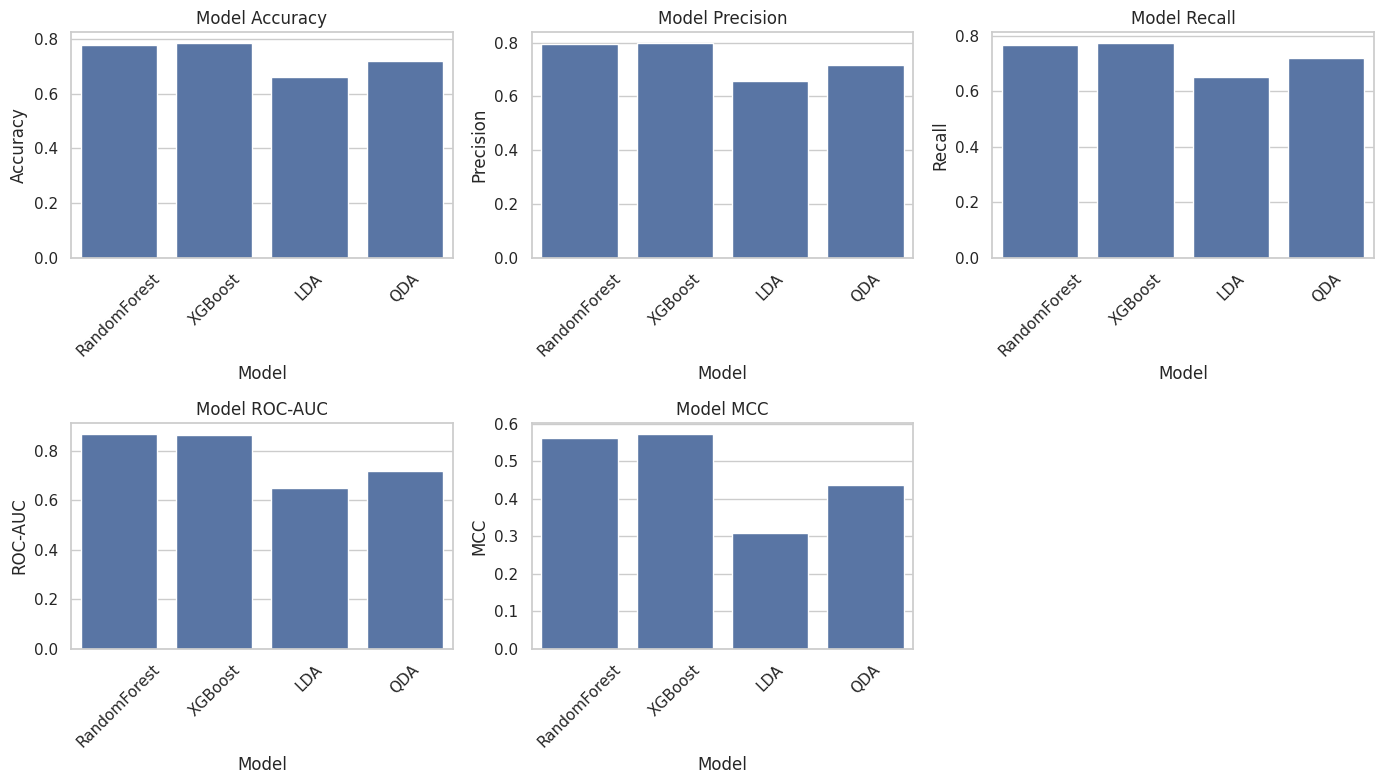

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style and size of the plots
sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))

# Plot Accuracy
plt.subplot(2, 3, 1)
sns.barplot(x='Model', y='Accuracy', data=results_df)
plt.title('Model Accuracy')
plt.xticks(rotation=45)

# Plot Precision
plt.subplot(2, 3, 2)
sns.barplot(x='Model', y='Precision', data=results_df)
plt.title('Model Precision')
plt.xticks(rotation=45)

# Plot Recall
plt.subplot(2, 3, 3)
sns.barplot(x='Model', y='Recall', data=results_df)
plt.title('Model Recall')
plt.xticks(rotation=45)

# Plot ROC-AUC
plt.subplot(2, 3, 4)
sns.barplot(x='Model', y='ROC-AUC', data=results_df)
plt.title('Model ROC-AUC')
plt.xticks(rotation=45)

# Plot MCC
plt.subplot(2, 3, 5)
sns.barplot(x='Model', y='MCC', data=results_df)
plt.title('Model MCC')
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

Using all the features to train

In [ ]:
best_models = {}
for model_name in models.keys():
    grid_search = GridSearchCV(models[model_name], param_grids[model_name], cv=10, scoring='accuracy')
    grid_search.fit(X,y)
    best_models[model_name] = grid_search.best_estimator_
    print(f'Best parameters for {model_name}: {grid_search.best_params_}')

Best parameters for RandomForest: {'max_depth': 30, 'n_estimators': 200}


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:37:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:37:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:37:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:37:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:37:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Best parameters for XGBoost: {'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 200}
Best parameters for LDA: {'solver': 'svd'}
Best parameters for QDA: {'reg_param': 0.0}


In [ ]:
results_full = []
for model_name, model in best_models.items():
    y_pred = model.predict(val_df_X)
    y_proba = model.predict_proba(val_df_X)[:, 1] if hasattr(model, 'predict_proba') else y_pred

    accuracy_full = accuracy_score(val_df_y, y_pred)
    precision_full = precision_score(val_df_y, y_pred, average='macro')
    recall_full = recall_score(val_df_y, y_pred, average='macro')
    roc_auc_full = roc_auc_score(val_df_y, y_proba, multi_class='ovr') if model_name in ['RandomForest', 'XGBoost'] else roc_auc_score(val_df_y, y_pred, multi_class='ovr')
    mcc_full = matthews_corrcoef(val_df_y, y_pred)

    results_full.append({
        'Model': model_name,
        'Accuracy': accuracy_full,
        'Precision': precision_full,
        'Recall': recall_full,
        'ROC-AUC': roc_auc_full,
        'MCC': mcc_full
    })

    print(f'{model_name} Results:')
    print(f'Accuracy: {accuracy_full}')
    print(f'Precision: {precision_full}')
    print(f'Recall: {recall_full}')
    print(f'ROC-AUC: {roc_auc_full}')
    print(f'MCC: {mcc_full}')

RandomForest Results:
Accuracy: 0.9772991850989523
Precision: 0.9772475834818188
Recall: 0.9769185709122084
ROC-AUC: 0.9974443447814331
MCC: 0.9541660976694862
XGBoost Results:
Accuracy: 0.9848661233993015
Precision: 0.9846219736580801
Recall: 0.9848380757234468
ROC-AUC: 0.9988014221527963
MCC: 0.9694600252959015
LDA Results:
Accuracy: 0.8282887077997672
Precision: 0.8294609388478489
Recall: 0.823248238295742
ROC-AUC: 0.823248238295742
MCC: 0.6526796092106091
QDA Results:
Accuracy: 0.8972642607683353
Precision: 0.9008910202422703
Recall: 0.8926120413815413
ROC-AUC: 0.8926120413815413
MCC: 0.7934598712697362


In [ ]:
results_full=pd.DataFrame(results_full)

In [ ]:
results_full.head()

,Model,Accuracy,Precision,Recall,ROC-AUC,MCC
0,RandomForest,0.977299,0.977248,0.976919,0.997444,0.954166
1,XGBoost,0.984866,0.984622,0.984838,0.998801,0.969460
2,LDA,0.828289,0.829461,0.823248,0.823248,0.652680
3,QDA,0.897264,0.900891,0.892612,0.892612,0.793460


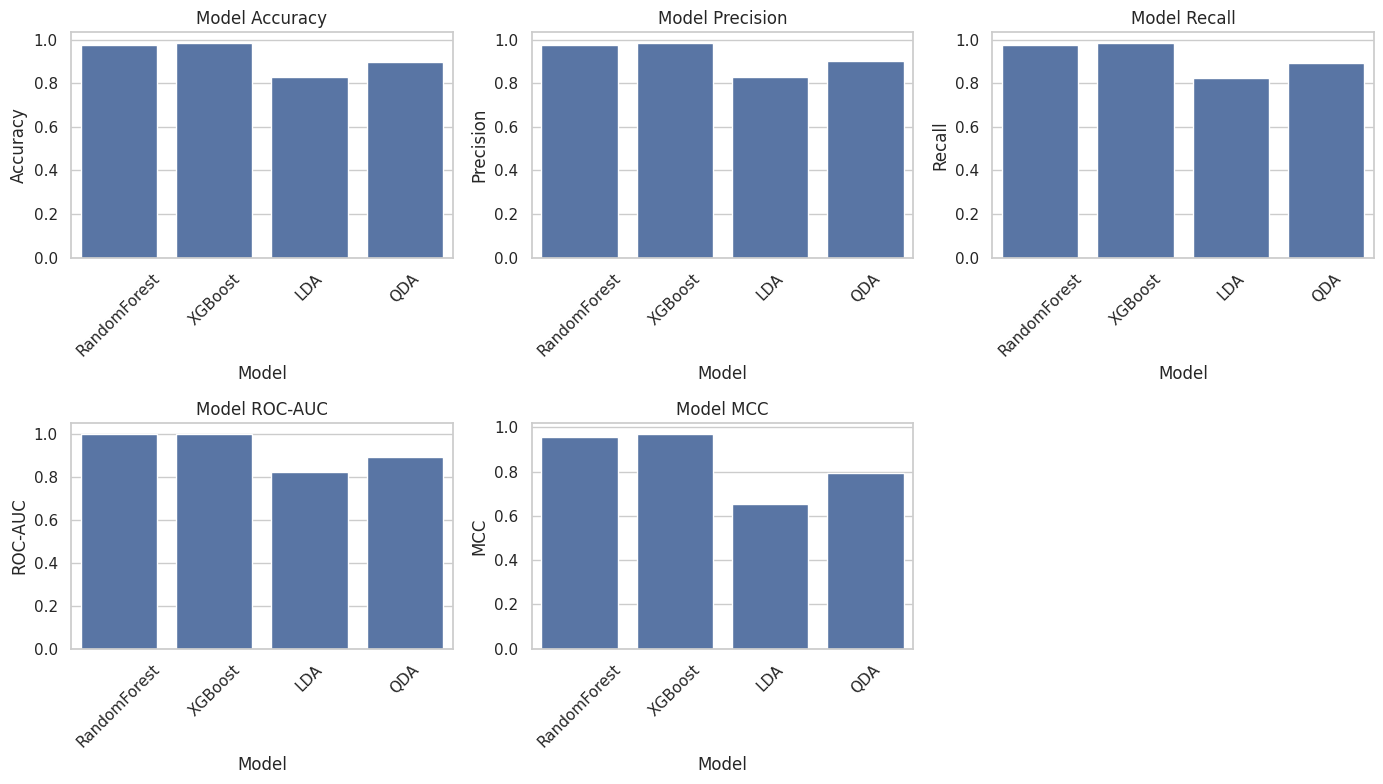

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))

# Plot Accuracy
plt.subplot(2, 3, 1)
sns.barplot(x='Model', y='Accuracy', data= results_full)
plt.title('Model Accuracy')
plt.xticks(rotation=45)

# Plot Precision
plt.subplot(2, 3, 2)
sns.barplot(x='Model', y='Precision', data= results_full)
plt.title('Model Precision')
plt.xticks(rotation=45)

# Plot Recall
plt.subplot(2, 3, 3)
sns.barplot(x='Model', y='Recall', data= results_full)
plt.title('Model Recall')
plt.xticks(rotation=45)

# Plot ROC-AUC
plt.subplot(2, 3, 4)
sns.barplot(x='Model', y='ROC-AUC', data= results_full)
plt.title('Model ROC-AUC')
plt.xticks(rotation=45)

# Plot MCC
plt.subplot(2, 3, 5)
sns.barplot(x='Model', y='MCC', data= results_full)
plt.title('Model MCC')
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
results_full = pd.DataFrame(results_full)
results_full.head()

,Model,Accuracy,Precision,Recall,ROC-AUC,MCC
0,RandomForest,0.977299,0.977248,0.976919,0.997444,0.954166
1,XGBoost,0.984866,0.984622,0.984838,0.998801,0.969460
2,LDA,0.828289,0.829461,0.823248,0.823248,0.652680
3,QDA,0.897264,0.900891,0.892612,0.892612,0.793460


**Results on the test data**

In [ ]:
test_df_X = test_df.drop('label', axis=1) # creating test data set for predicting with all the features
test_df_y = test_df['label']
test_df_X.head()




,chroma_stft,rms,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,spectral_contrast
17461,0.365134,0.076412,1975.911940,2206.683710,3613.662997,0.091653,-218.438522,106.122536,28.308607,30.060143,...,4.789136,-6.014166,0.313059,1.593295,-0.273854,-2.082677,-0.873518,-1.587119,3.800429,20.991213
30711,0.375933,0.010603,3737.550648,2704.546596,6628.556130,0.237660,-410.675781,32.376377,12.715653,10.995457,...,-8.105097,-15.196650,-9.691590,-16.987555,-9.953490,-17.116217,-5.803188,-9.912661,-5.966577,23.191275
12830,0.404555,0.029667,2202.294640,2039.620203,3729.328024,0.134833,-252.879532,101.178268,-35.408714,-10.498384,...,-2.365199,-11.855434,-12.267428,-5.872340,-0.034023,-16.207609,-11.264091,-16.061478,-11.070790,22.281252
8321,0.645328,0.001500,2676.294579,1947.659169,4345.057817,0.193825,-467.493378,63.879787,-78.166695,11.794599,...,1.818008,-1.904529,3.349729,-5.097968,0.777408,-3.470965,3.104166,-1.023703,3.690407,19.107569
21379,0.431005,0.037365,3371.676548,2800.929399,6311.675471,0.212913,-237.817963,63.982288,27.169537,6.514048,...,-10.607383,-5.156765,3.791132,-2.670527,2.870454,-11.830977,-4.741257,-9.651224,-9.196715,20.555885


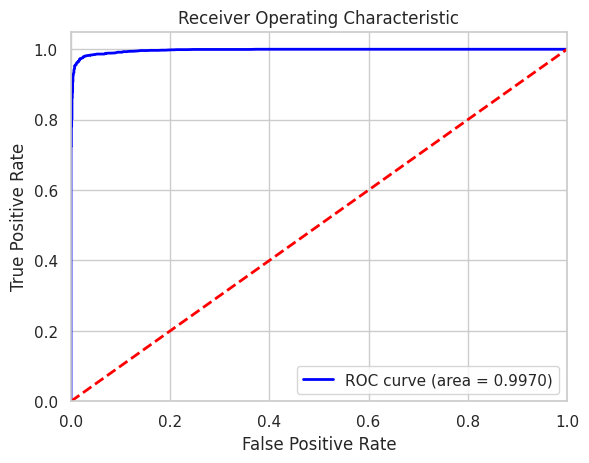

RandomForest Results:
Accuracy: 0.9761350407450524
Precision: 0.9755665643540312
Recall: 0.9761667712119098
ROC-AUC: 0.9969703028633965
MCC: 0.9517331463068834


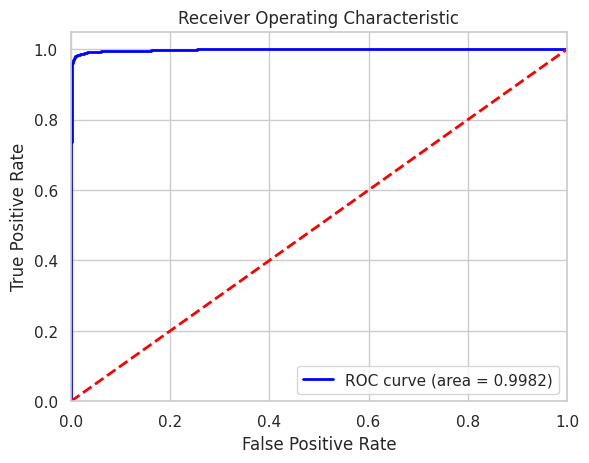

XGBoost Results:
Accuracy: 0.9848661233993015
Precision: 0.9842373771860919
Recall: 0.985199274436579
ROC-AUC: 0.9981782033971431
MCC: 0.9694361744143113


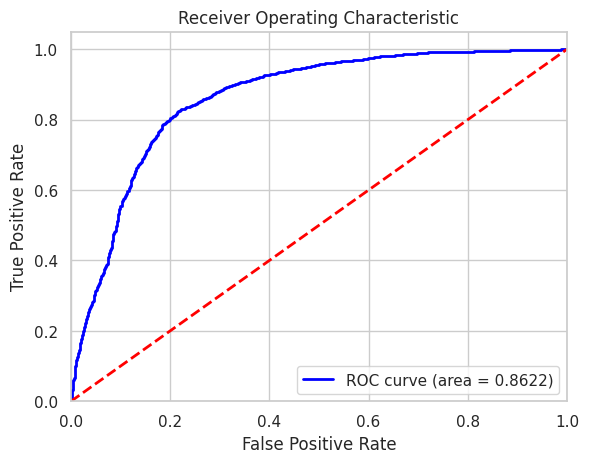

LDA Results:
Accuracy: 0.8020954598370198
Precision: 0.800512205131402
Recall: 0.7975967512208473
ROC-AUC: 0.7975967512208472
MCC: 0.5981018506887202


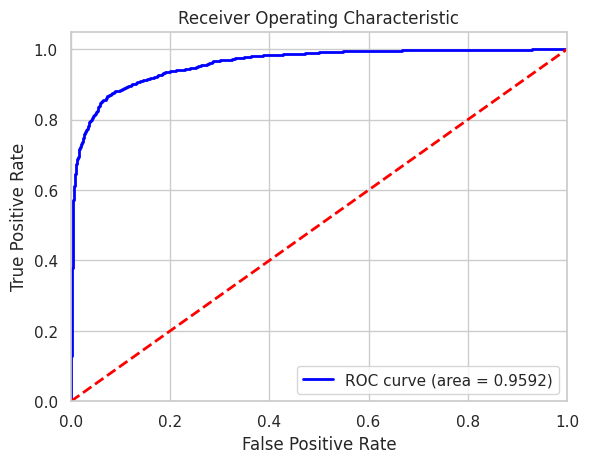

QDA Results:
Accuracy: 0.8812572759022119
Precision: 0.8826630953778682
Recall: 0.8766912579484964
ROC-AUC: 0.8766912579484964
MCC: 0.7593308706179532


In [ ]:
results_test = []
for model_name, model in best_models.items():
    y_pred_test = model.predict(test_df_X)
    y_proba_test = model.predict_proba(test_df_X)[:, 1] if hasattr(model, 'predict_proba') else y_pred_test

    accuracy_test = accuracy_score(test_df_y, y_pred_test)
    precision_test = precision_score(test_df_y, y_pred_test, average='macro')
    recall_test = recall_score(test_df_y, y_pred_test, average='macro')
    roc_auc_test = roc_auc_score(test_df_y, y_proba_test, multi_class='ovr') if model_name in ['RandomForest', 'XGBoost'] else roc_auc_score(test_df_y, y_pred_test, multi_class='ovr')
    mcc_test = matthews_corrcoef(test_df_y, y_pred_test)
    # ROC-AUC Curve
    fpr, tpr, thresholds = roc_curve(test_df_y, y_proba_test)
    roc_auc = roc_auc_score(test_df_y, y_proba_test)
    plt.figure()
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
    results_test.append({
        'Model': model_name,
        'Accuracy': accuracy_test,
        'Precision': precision_test,
        'Recall': recall_test,
        'ROC-AUC': roc_auc_test,
        'MCC': mcc_test
    })

    print(f'{model_name} Results:')
    print(f'Accuracy: {accuracy_test}')
    print(f'Precision: {precision_test}')
    print(f'Recall: {recall_test}')
    print(f'ROC-AUC: {roc_auc_test}')
    print(f'MCC: {mcc_test}')

In [ ]:
results_test = pd.DataFrame(results_test)
results_test.head()

,Model,Accuracy,Precision,Recall,ROC-AUC,MCC
0,RandomForest,0.976135,0.975567,0.976167,0.996970,0.951733
1,XGBoost,0.984866,0.984237,0.985199,0.998178,0.969436
2,LDA,0.802095,0.800512,0.797597,0.797597,0.598102
3,QDA,0.881257,0.882663,0.876691,0.876691,0.759331


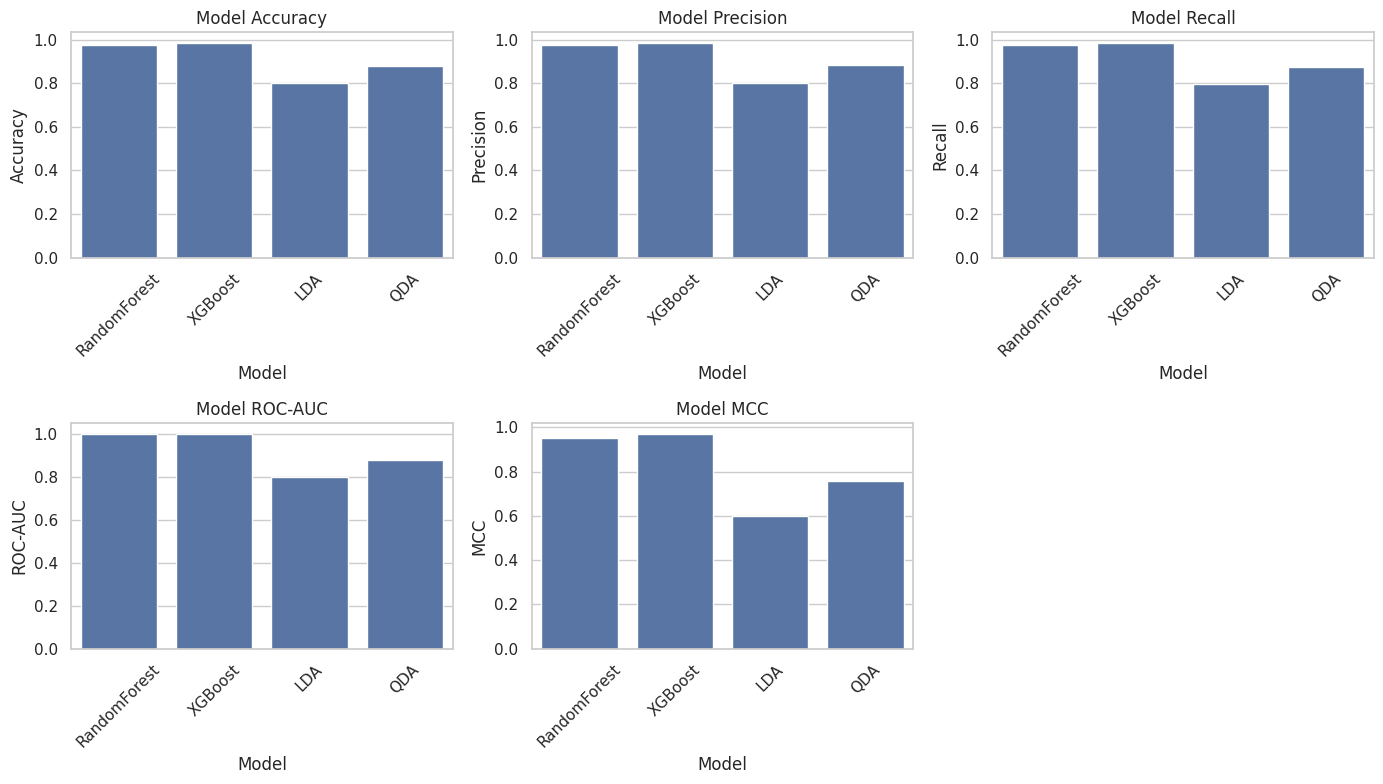

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))

# Plot Accuracy
plt.subplot(2, 3, 1)
sns.barplot(x='Model', y='Accuracy', data= results_test)
plt.title('Model Accuracy')
plt.xticks(rotation=45)

# Plot Precision
plt.subplot(2, 3, 2)
sns.barplot(x='Model', y='Precision', data= results_test)
plt.title('Model Precision')
plt.xticks(rotation=45)

# Plot Recall
plt.subplot(2, 3, 3)
sns.barplot(x='Model', y='Recall', data= results_test)
plt.title('Model Recall')
plt.xticks(rotation=45)

# Plot ROC-AUC
plt.subplot(2, 3, 4)
sns.barplot(x='Model', y='ROC-AUC', data= results_test)
plt.title('Model ROC-AUC')
plt.xticks(rotation=45)

# Plot MCC
plt.subplot(2, 3, 5)
sns.barplot(x='Model', y='MCC', data= results_test)
plt.title('Model MCC')
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()